<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/02_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trenowanie prostej sieci neuronowej na zbiorze MNIST

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### Załadowanie danych

In [0]:
# zdefiniowanie wymiarów obrazu wejsciowego
img_rows, img_cols = 28, 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Eksploracja danych


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba dabych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba dabych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


### Wyświetlenie obrazka

(-0.5, 27.5, 27.5, -0.5)

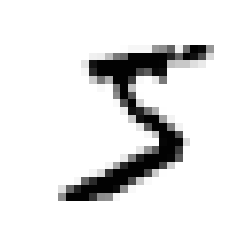

In [0]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

### Wyświetlenie kilku obrazków

In [0]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

### Wyświetlenie danych

In [0]:
print(X_train[0][10])

# dolna połówka obrazka
plt.imshow(X_train[0][14:], cmap='Greys')

In [0]:
# górna połówka obrazka
plt.imshow(X_train[0][:14], cmap='Greys')

### Przycinanie obrazka

In [0]:
plt.imshow(X_train[0][5:20, 5:20], cmap='Greys')

### Obsługa problemu zapisu obrazów wejściowych - channel first vs. channel last

In [0]:
print(K.image_data_format())

if K.image_data_format() == 'channel_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print(input_shape)

channels_last
(28, 28, 1)


### Wyświetlenie etykiet

In [0]:
print('y_train:', y_train)
print('y_train shape:', y_train.shape)

y_train: [5 0 4 ... 5 6 8]
y_train shape: (60000,)


## Przygotowanie danych

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Przygotowanie etykiet 

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Budowa modelu

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

### Kompilacja modelu

In [0]:
model.compile(optimizer='adadelta',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0711 08:08:29.919452 139693191944064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 08:08:29.953210 139693191944064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Trenowanie modelu

In [0]:
history = model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=20,
                   validation_data=(X_test, y_test))

W0711 08:08:33.070628 139693191944064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.2633 - acc: 0.9198 - val_loss: 0.0558 - val_acc: 0.9816
Epoch 2/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0888 - acc: 0.9738 - val_loss: 0.0403 - val_acc: 0.9863
Epoch 3/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0659 - acc: 0.9803 - val_loss: 0.0334 - val_acc: 0.9886
Epoch 4/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0563 - acc: 0.9833 - val_loss: 0.0318 - val_acc: 0.9897
Epoch 5/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0449 - acc: 0.9863 - val_loss: 0.0299 - val_acc: 0.9900
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0416 - acc: 0.9876 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0387 - acc: 0.9884 - val_loss: 0.0286 -

### Ocena modelu

In [0]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 105us/step
Test loss: 0.030402481143582055
Test accuracy: 0.9911


### Wykres dokładności

In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

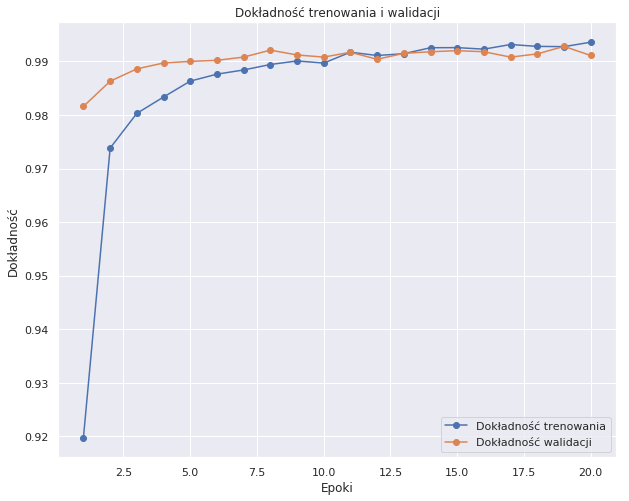

In [0]:
make_accuracy_plot(history)

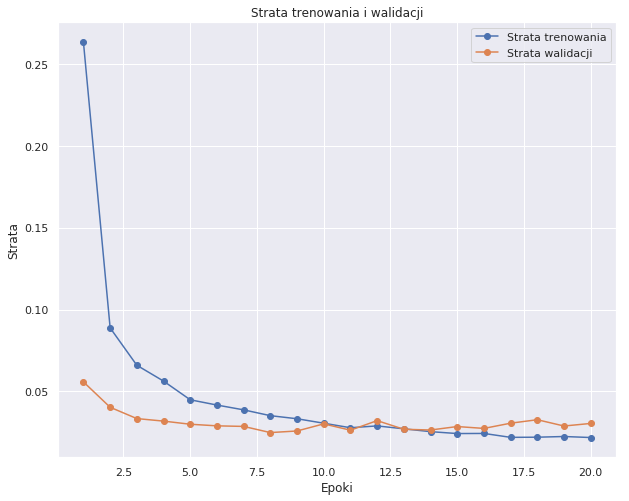

In [0]:
make_loss_plot(history)